# Python y estadística en Análisis Financiero

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  #


#### Vamos a manejar un poco los datos pertenecientes a los valores de las acciones de Microsoft y Facebook. Primero crearemos los dataframes:

In [68]:
fbook = pd.read_csv('facebook.csv')
fbook = fbook.set_index('Date')
msoft = pd.read_csv('microsoft.csv')
msoft = msoft.set_index('Date')

In [69]:
print(msoft.head())
print("")
print(fbook.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-12-31  46.730000  47.439999  46.450001  46.450001  42.848763  21552500
2015-01-02  46.660000  47.419998  46.540001  46.759998  43.134731  27913900
2015-01-05  46.369999  46.730000  46.250000  46.330002  42.738068  39673900
2015-01-06  46.380001  46.750000  45.540001  45.650002  42.110783  36447900
2015-01-07  45.980000  46.459999  45.490002  46.230000  42.645817  29114100

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2014-12-31  20.400000  20.510000  19.990000  20.049999  19.459270  4157500
2015-01-02  20.129999  20.280001  19.809999  20.129999  19.536913  2842000
2015-01-05  20.129999  20.190001  19.700001  19.790001  19.206934  4948800
2015-01-06  19.820000  19.840000  19.170000  19.190001  18.624611  4944100
2015-01-07  19.33

Dado que solamente tenemos un valor del año 2014 (en cada caso) vamos a eliminarlo:


In [75]:
msoft = msoft.drop(['2014-12-31'])
fbook = fbook.drop(['2014-12-31'])

In [80]:
#Resumen estadístico de los dataframes
print(msoft.describe())
#print("")
#print(fbook.describe())  # No los muestro para no sobrecargar la pantalla. SI se elimina el primer # se puede ver

             Open        High         Low       Close   Adj Close  \
count  779.000000  779.000000  779.000000  779.000000  779.000000   
mean    58.927946   59.387625   58.480424   58.961438   56.949631   
std     12.852869   12.869210   12.803803   12.830765   13.669530   
min     40.340000   40.740002   39.720001   40.290001   37.267815   
25%     47.949999   48.365000   47.555000   48.019998   44.819246   
50%     56.150002   56.650002   55.720001   56.209999   53.817902   
75%     67.895001   68.219998   67.465000   67.770001   66.604199   
max     95.139999   96.070000   93.720001   95.010002   94.565781   

             Volume  
count  7.790000e+02  
mean   2.979958e+07  
std    1.523010e+07  
min    7.425600e+06  
25%    2.096550e+07  
50%    2.627170e+07  
75%    3.408070e+07  
max    1.691640e+08  


##### Vamos a trabajar solamente con un "slice" de los datos. Tomaremos los valores de cierre del año 2015 y los mostraremos respecto a las fechas. 

In [84]:
msoft_2015 = msoft.loc['2015-01-01':'2015-12-31']
fbook_2015 = fbook.loc['2015-01-01':'2015-12-31']
print(msoft_2015.shape) #Dimensiones de cada uno
print(fbook_2015.shape)

(252, 6)
(252, 6)


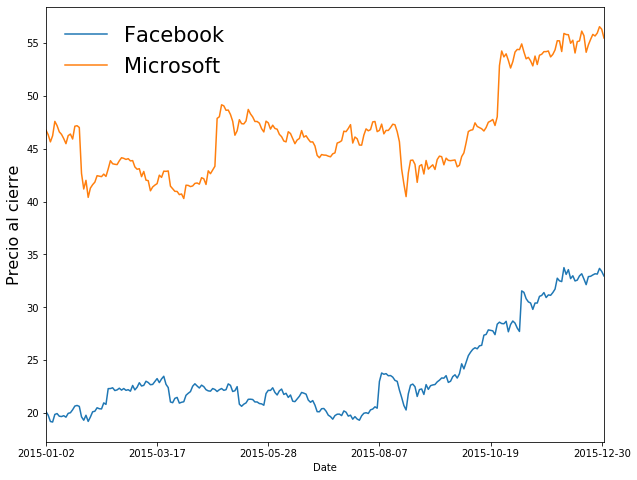

In [158]:
plt.figure(figsize=(10, 8))
fbook_2015['Close'].plot(label='Facebook')
msoft_2015['Close'].plot(label='Microsoft')
plt.ylabel('Precio al cierre', fontsize=16)

plt.legend(loc='best',prop={'size': 21},frameon=False)
plt.show()




### Ahora calculamos el rendimiento diario a través de los valores que tenemos. Seguimos trabajando con los datos del 2015 por comodidad pero es aplicable a todo el dataset.

In [166]:
#Primero debemos calcular la diferencia de precios entre dos dias consecutivos
msoft_2015['PriceDiff'] = msoft_2015['Close'].shift(-1) - msoft_2015['Close']
fbook_2015['PriceDiff'] = fbook_2105['Close'].shift(-1) - fbook_2015['Close']
msoft_2015 = msoft_2015.dropna() 
fbook_2015 = fbook_2015.dropna()

In [169]:
#Ahora podemos calcular el rendimiento diario (daily return)
fbook_2015['Return'] = fbook_2015['PriceDiff'] /fbook_2015['Close']
msoft_2015['Return'] = msoft_2015['PriceDiff'] /msoft_2015['Close']
#fbook_2015.head()
msoft_2015.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
Date,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418
2015-01-08,46.750000,47.750000,46.720001,47.590000,43.900375,29645200,-0.400001,-0.008405


### Según el valor que tenga la columna 'PriceDiff' podemos crear una nueva variable 'Dirección' que tomará dos valores: arriba(1) o abajo(-1)

In [179]:
#Creando la variable dirección mediante condiciones:
fbook_2015['Direction'] = [1 if fbook_2015['PriceDiff'].loc[i] > 0 else -1 for i in fbook_2015.index ]
msoft_2015['Direction'] = [1 if msoft_2015['PriceDiff'].loc[i] > 0 else -1 for i in msoft_2015.index ]
msoft_2015.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,-1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1
2015-01-08,46.750000,47.750000,46.720001,47.590000,43.900375,29645200,-0.400001,-0.008405,-1


### Dado que existen fluctuaciones en los precios de las acciones, podemos definir una media móvil. Esta media movil MA se toma como la media de los precios en un determinado periodo de dias. MA(10) => 10 días, MA(40) => 40 días...

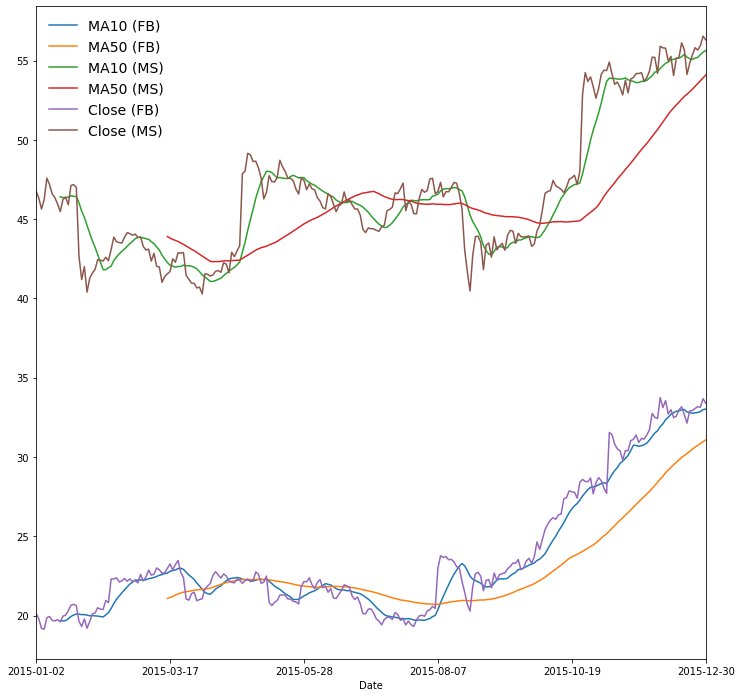

In [197]:
#Creamos la media móvil (moving average):
fbook_2015['MA10'] = fbook_2015['Close'].rolling(10).mean()
fbook_2015['MA50'] = fbook_2015['Close'].rolling(50).mean()


msoft_2015['MA10'] = msoft_2015['Close'].rolling(10).mean()
msoft_2015['MA50'] = msoft_2015['Close'].rolling(50).mean()



plt.figure(figsize=(12, 12))
fbook_2015['MA10'].loc['2015-01-01':'2015-12-31'].plot(label='MA10 (FB)')
fbook_2015['MA50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50 (FB)')

msoft_2015['MA10'].loc['2015-01-01':'2015-12-31'].plot(label='MA10 (MS)')
msoft_2015['MA50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50 (MS)')


fbook_2015['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close (FB)')
msoft_2015['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close (MS)')

plt.legend(prop={'size': 14},frameon=False)
plt.show()